In [1]:
from demo_model import SGG_Model
import cv2
import os

import matplotlib.pyplot as plt

config_path = "../checkpoints/VG150/SGDET/penet-yolov8m/config.yml"
dict_path = "../datasets/VG150/VG-SGG-dicts-with-attri.json"
weights_path = "../checkpoints/VG150/SGDET/penet-yolov8m/best_model_epoch_2.pth"

source = "/home/maelic/Downloads/results-20240604T143925Z-001/results"

if '.jpg' in source:
    example_img = source

    img = cv2.imread(example_img)

    model = SGG_Model(config_path, dict_path, weights_path, rel_conf=0.01, box_conf=0.1, show_fps=False)

    img, graph = model.predict(img, visu=True)

    clean_img = model.nice_plot(img, graph)

elif os.path.isdir(source):
    os.makedirs(source + '/results', exist_ok=True)
    model = SGG_Model(config_path, dict_path, weights_path, rel_conf=0.01, box_conf=0.2, show_fps=False)

    for file in os.listdir(source):
        example_img = source + '/' + file

        img = cv2.imread(example_img)

        img, graph = model.predict(img, visu=True)

        clean_img = model.nice_plot(img, graph)
        # to rgb
        clean_img = cv2.cvtColor(clean_img, cv2.COLOR_BGR2RGB)
        # save to dir
        cv2.imwrite(source + '/results/res_' + file, clean_img)

2024-06-04 16:55:57.691 | INFO     | sgg_benchmark.utils.logger:setup_logger:30 - Using loguru logger with level: INFO
True
Overriding model.yaml nc=80 with nc=150

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640 

libpng warning: iCCP: known incorrect sRGB profile


Number of objects detected:  8
Number of relationships detected:  5
Detection time:  0.08670449256896973 s
Number of objects detected:  5
Number of relationships detected:  10
Detection time:  0.06760072708129883 s
Number of objects detected:  2
Number of relationships detected:  2
Detection time:  0.09067010879516602 s
Number of objects detected:  8
Number of relationships detected:  21
Detection time:  0.07969427108764648 s
Number of objects detected:  1
Number of relationships detected:  0
Detection time:  0.10743331909179688 s
Number of objects detected:  3
Number of relationships detected:  2
Detection time:  0.11333942413330078 s
Number of objects detected:  7
Number of relationships detected:  6


AttributeError: 'NoneType' object has no attribute 'copy'

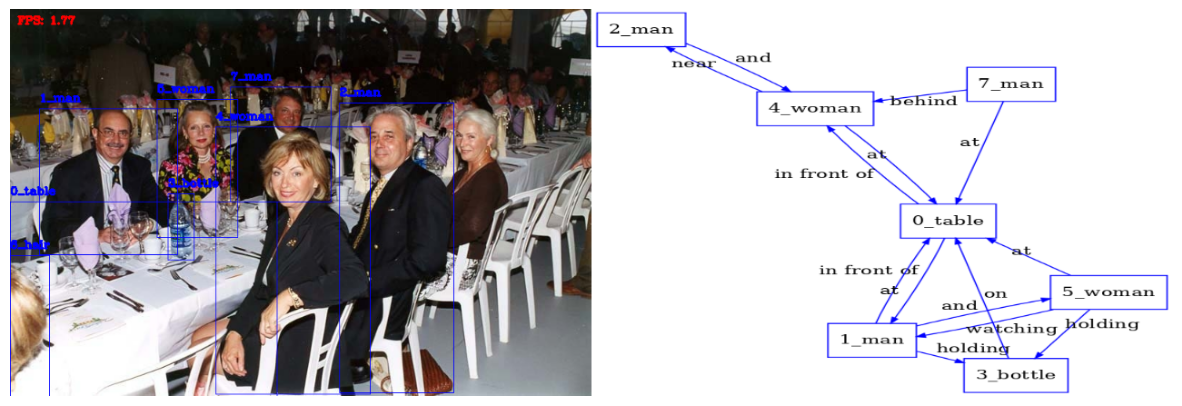

In [ ]:
plt.figure(figsize=(15, 15))  # You can adjust the size as needed
plt.imshow(clean_img)
plt.axis('off')
plt.show()